# Name: Yashwant Gawkar
**Sparks Foundation Data Science Intern Task #2 ||
 Prediction Using Unsupervised ML**


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv("https://raw.githubusercontent.com/yashwant-gawkar/Sparks_Foundation_Task_2/main/Iris%20(1).csv")


print("Data imported successfully")
print("DATA:")
data

Data imported successfully
DATA:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:

x = data.iloc[:, 1:-1].values


# Plot graph of Within-cluster sum of square(WCSS) vs Number of clusters

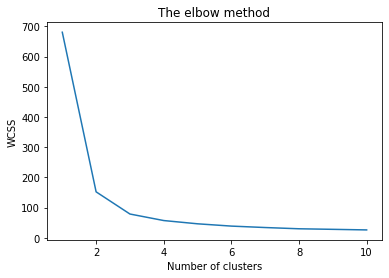

In [19]:

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    


plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

# RESULT
# Since the elbow of the graph is at 3, hence 3 is the optimal number of clusters.


In [20]:

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 100)
y_kmeans = kmeans.fit_predict(x)

# Visualization

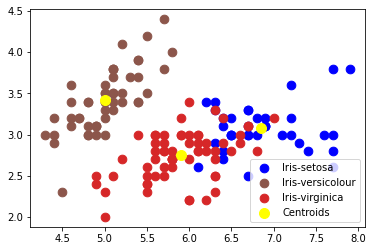

In [21]:


plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 75, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 75, c = '#8c564b', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 75, c = '#d62728', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()